In [1]:
import time
from nldg.utils import *
from nldg.rf import MaggingRF
from adaXT.random_forest import RandomForest
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from experiments.old_experiments.bcd_test_runtime import assign_quadrant

NAME_RF = "MaxRM-RF"

## MaxRM Random Forest

In [9]:
dtr = gen_data_v6(n=1000, noise_std=0.5, setting=2)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dte = gen_data_v6(
    n=1000,
    noise_std=0.5,
    random_state=42,
    setting=2,
)
Xte = np.array(dte.drop(columns=["E", "Y"]))
Yte = np.array(dte["Y"])
Ete = np.array(dte["E"])

In [10]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xte)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Yte, fitted_rf, Ete, verbose=True)

Environment 0 MSE: 25.055145217894687
Environment 1 MSE: 9.26349195836476
Environment 2 MSE: 3.5897816767330646


np.float64(25.055145217894687)

In [11]:
rf.modify_predictions_trees(Etr)  # n_jobs=2 to parallelize
fitted_minmax = rf.predict(Xte)
preds_minmax = rf.predict(Xtr_sorted)
max_mse(Yte, fitted_minmax, Ete, verbose=True)

Environment 0 MSE: 16.55721457860687
Environment 1 MSE: 15.807221397806314
Environment 2 MSE: 7.931262787596784


np.float64(16.55721457860687)

In [12]:
rf_magging = MaggingRF(
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state,
    backend='adaXT',
)
_ = rf_magging.fit(Xtr, Ytr, Etr)
wmag = rf_magging.get_weights()
fitted_magging = rf_magging.predict(Xte)
preds_magging = rf_magging.predict(Xtr_sorted)
max_mse(Yte, fitted_magging, Ete, verbose=True)

Environment 0 MSE: 33.71309598902495
Environment 1 MSE: 5.2957794618437415
Environment 2 MSE: 1.487742332074125


np.float64(33.71309598902495)

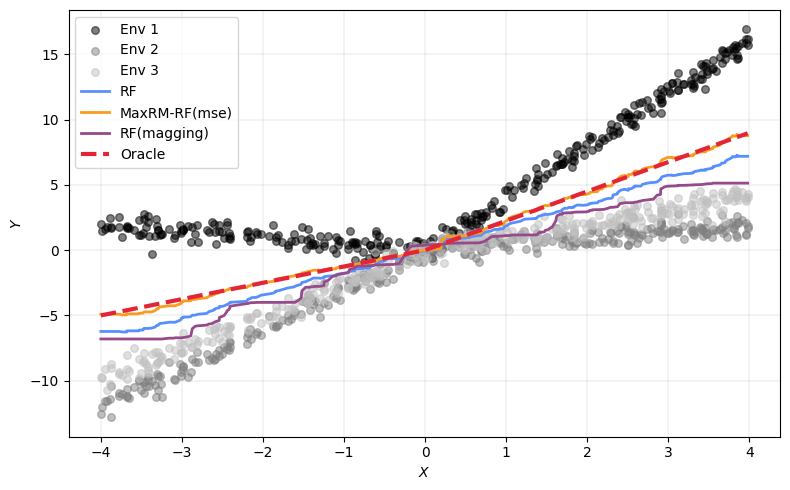

In [13]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_minmax
dtr["fitted_magging"] = preds_magging
plot_dtr(dtr, optfun=4, saveplot=True, nameplot="setting9_intro")

## CVXPY vs. Extragradient

In [14]:
# Fit RF again to start with the same predictions
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(Xtr, Ytr)
rf.modify_predictions_trees(Etr, opt_method="extragradient")  # n_jobs=2 to parallelize
fitted_minmax_xtrgrd = rf.predict(Xte)
preds_minmax_xtrgrd = rf.predict(Xtr_sorted)
max_mse(Yte, fitted_minmax_xtrgrd, Ete, verbose=True)

Environment 0 MSE: 16.17731103164889
Environment 1 MSE: 16.214772481469296
Environment 2 MSE: 8.190011157009929


np.float64(16.214772481469296)

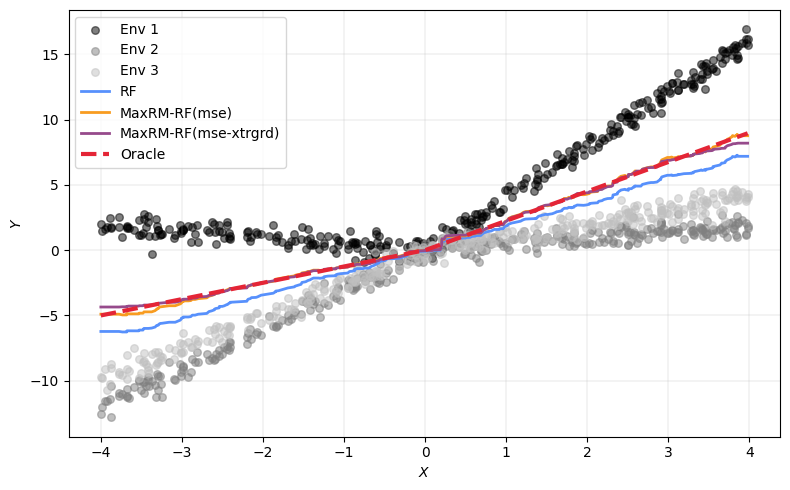

In [15]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_minmax
dtr["fitted_minmax_xtrgrd"] = preds_minmax_xtrgrd
dtr = dtr.drop(columns=["fitted_magging"])
plot_dtr(dtr, optfun=4, saveplot=True, nameplot="setting9_xtrgrd")

In [16]:
dtr = gen_data_v7(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dte = gen_data_v7(n=1000, random_state=42)
Xte = np.array(dte.drop(columns=["E", "Y"]))
Yte = np.array(dte["Y"])
Ete = np.array(dte["E"])

In [17]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xte)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Yte, fitted_rf, Ete, verbose=True)

Environment 0 MSE: 0.6079114860989555
Environment 1 MSE: 0.9306997138510015
Environment 2 MSE: 0.19786348631068576


np.float64(0.9306997138510015)

In [18]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xte)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Yte, fitted_rf_2, Ete, verbose=True)

Environment 0 MSE: 0.7077400003009647
Environment 1 MSE: 0.7554148471780795
Environment 2 MSE: 0.35751306972756924


np.float64(0.7554148471780795)

In [19]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(Xtr, Ytr)
rf.modify_predictions_trees(Etr, opt_method="extragradient")
fitted_rf_3 = rf.predict(Xte)
preds_rf_3 = rf.predict(Xtr_sorted)
max_mse(Yte, fitted_rf_3, Ete, verbose=True)

Environment 0 MSE: 0.7108031850608127
Environment 1 MSE: 0.7513138828599542
Environment 2 MSE: 0.35575076520516435


np.float64(0.7513138828599542)

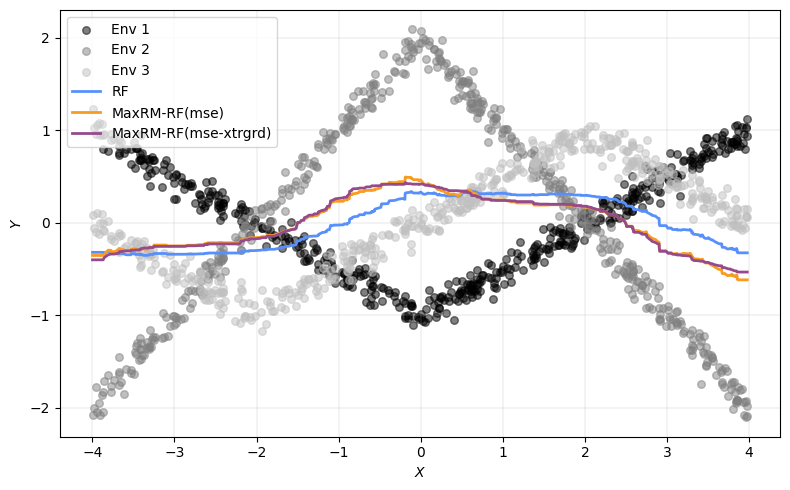

In [20]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_minmax_xtrgrd"] = preds_rf_3
plot_dtr(dtr, saveplot=True, nameplot="setting6_xtrgrd")

## BCD vs. non-BCD

In [14]:
# We don't split into train and test: this part is just for demonstration
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
Z = X[["Latitude", "Longitude"]]
X = X.drop(["Latitude", "Longitude"], axis=1)
env = assign_quadrant(Z)
n_estimators = 25
min_samples_leaf = 30
random_state = 42

In [15]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(X, y)

In [16]:
fitted_rf = rf.predict(X)
max_mse(y, fitted_rf, env, verbose=True)

Environment 0 MSE: 0.4921733751923124
Environment 1 MSE: 0.37946957760226163
Environment 2 MSE: 0.25899077573464746
Environment 3 MSE: 0.3463298023479681


np.float64(0.4921733751923124)

In [17]:
mean_squared_error(y, fitted_rf)

0.38480567847408337

In [18]:
start = time.time()
rf.modify_predictions_trees(env, bcd=True, patience=1, block_size=15)
end = time.time()
print("Runtime BCD:", end-start)

Runtime BCD: 63.633126974105835


In [18]:
fitted_minimax_bcd = rf.predict(X)
max_mse(y, fitted_minimax_bcd, env, verbose=True)

Environment 0 MSE: 0.4570770739107059
Environment 1 MSE: 0.4080104084131193
Environment 2 MSE: 0.32001547966523747
Environment 3 MSE: 0.44891654056726926


np.float64(0.4570770739107059)

In [19]:
mean_squared_error(y, fitted_minimax_bcd)

0.41802588687032527

In [20]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(X, y)
start = time.time()
rf.modify_predictions_trees(env)
end = time.time()
print("Runtime non-BCD:", end-start)

Runtime non-BCD: 86.77420687675476


In [21]:
fitted_minimax_nonbcd = rf.predict(X)
max_mse(y, fitted_minimax_nonbcd, env, verbose=True)

Environment 0 MSE: 0.443741696904038
Environment 1 MSE: 0.3955020622600035
Environment 2 MSE: 0.3263607994480051
Environment 3 MSE: 0.43573943130756415


np.float64(0.443741696904038)

In [22]:
mean_squared_error(y, fitted_minimax_nonbcd)

0.40680531109511364

Note that if the block size is larger than the number of leaves, the result of the block-coordinate descent (BCD) algorithm is the same as the non-BCD version.

## Different Objectives

In [14]:
demean_setting = 1
dtr = gen_data_v5(n_samples=1000, adv_fraction=0.1, noise_var_env2=2, setting=2)

Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr_orig = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
random_state = 42
min_samples_leaf = 30

dte = gen_data_v5(n_samples=1000, adv_fraction=0.1, noise_var_env2=2, setting=2, random_state=42)
Xte = np.array(dte.drop(columns=["E", "Y"]))
Yte_orig = np.array(dte['Y'])
Ete = np.array(dte["E"])

if demean_setting == 1:
    Ytr = Ytr_orig
    Yte = Yte_orig
elif demean_setting == 2:
    Ytr = np.zeros_like(Ytr_orig)
    for env in np.unique(Etr):
        idx = Etr == env
        Ytr[idx] = Ytr_orig[idx] - np.mean(Ytr_orig[idx])
    Yte = np.zeros_like(Yte_orig)
    for env in np.unique(Ete):
        idx = Ete == env
        Yte[idx] = Yte_orig[idx] - np.mean(Yte_orig[idx])

# Fit standard RF for each environment separately.
# This is used for the regret
sols_erm = np.zeros(Etr.shape[0])
sols_erm_te = np.zeros(Ete.shape[0])
sols_erm_trees = np.zeros((n_estimators, Etr.shape[0]))
for env in np.unique(Etr):
    mask = Etr == env
    X_e = Xtr[mask]
    Y_e = Ytr[mask]
    rf_e = RandomForest(
        "Regression",
        n_estimators=n_estimators,
        min_samples_leaf=min_samples_leaf,
        seed=random_state
    )
    rf_e.fit(X_e, Y_e)
    fitted_e = rf_e.predict(X_e)
    sols_erm[mask] = fitted_e
    for i in range(n_estimators):
        fitted_e_tree = rf_e.trees[i].predict(X_e)
        sols_erm_trees[i, mask] = fitted_e_tree
    mask_e_te = Ete == env
    fitted_e_te = rf_e.predict(Xte[mask_e_te])
    sols_erm_te[mask_e_te] = fitted_e_te

#### Standard RF

In [15]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state,
)
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xte)
preds_rf = rf.predict(Xtr_sorted)

mse_rf, _ = max_mse(Yte, fitted_rf, Ete, ret_ind=True)
rw_rf, _ = min_reward(Yte, fitted_rf, Ete, ret_ind=True)
regret_rf, _ = max_regret(Yte, fitted_rf, sols_erm_te, Ete, ret_ind=True)

#### MSE

In [16]:
rf.modify_predictions_trees(Etr)  # modify solver with, e.g., solver="ECOS"
fitted_mse = rf.predict(Xte)
preds_mse = rf.predict(Xtr_sorted)

mse_mse, _ = max_mse(Yte, fitted_mse, Ete, ret_ind=True)
rw_mse, _ = min_reward(Yte, fitted_mse, Ete, ret_ind=True)
regret_mse, _ = max_regret(Yte, fitted_mse, sols_erm_te, Ete, ret_ind=True)

#### Reward

In [17]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state
)
rf.fit(Xtr, Ytr)
rf.modify_predictions_trees(Etr, method="reward")
fitted_rw = rf.predict(Xte)
preds_rw = rf.predict(Xtr_sorted)

mse_rw, _ = max_mse(Yte, fitted_rw, Ete, ret_ind=True)
rw_rw, _ = min_reward(Yte, fitted_rw, Ete, ret_ind=True)
regret_rw, _ = max_regret(Yte, fitted_rw, sols_erm_te, Ete, ret_ind=True)

#### Regret

In [18]:
rf = RandomForest(
    "Regression",
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    seed=random_state
)
rf.fit(Xtr, Ytr)
rf.modify_predictions_trees(
    Etr,
    method="regret",
    sols_erm=sols_erm,
    sols_erm_trees=sols_erm_trees
)
fitted_regret = rf.predict(Xte)
preds_regret = rf.predict(Xtr_sorted)

mse_regret, _ = max_mse(Yte, fitted_regret, Ete, ret_ind=True)
rw_regret, _ = min_reward(Yte, fitted_regret, Ete, ret_ind=True)
regret_regret, _ = max_regret(Yte, fitted_regret, sols_erm_te, Ete, ret_ind=True)

#### RF - magging

In [19]:
rf_magging = MaggingRF(
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state,
    backend='adaXT',
)
_ = rf_magging.fit(Xtr, Ytr, Etr)
wmag = rf_magging.get_weights()
fitted_magging = rf_magging.predict(Xte)
preds_magging = rf_magging.predict(Xtr_sorted)

mse_magging, _ = max_mse(Yte, fitted_magging, Ete, ret_ind=True)
rw_magging, _ = min_reward(Yte, fitted_magging, Ete, ret_ind=True)
regret_magging, _ = max_regret(Yte, fitted_magging, sols_erm_te, Ete, ret_ind=True)

#### Comparison

In [20]:
cols = pd.MultiIndex.from_product(
    [["MSE", "Reward", "Regret"], ["0", "1"]],
    names=["Metric", "Env"]
)
data = [
    [round(float(x), 3) for x in mse_rf + rw_rf + regret_rf],
    [round(float(x), 3) for x in mse_mse + rw_mse + regret_mse],
    [round(float(x), 3) for x in mse_rw + rw_rw + regret_rw],
    [round(float(x), 3) for x in mse_regret + rw_regret + regret_regret],
    [round(float(x), 3) for x in mse_magging + rw_magging + regret_magging],
]
df = pd.DataFrame(
    data,
    index=
    [
        "RF",
        f"{NAME_RF}(posthoc-mse)",
        f"{NAME_RF}(posthoc-nrw)",
        f"{NAME_RF}(posthoc-reg)",
        "RF(magging)"
    ],
    columns=cols)
print(df)

Metric                   MSE         Reward         Regret        
Env                        0       1      0       1      0       1
RF                     0.419  15.434  1.116  12.344  0.153  11.965
MaxRM-RF(posthoc-mse)  5.773   5.594 -4.238  22.185  5.507   2.125
MaxRM-RF(posthoc-nrw)  0.268  18.282  1.267   9.496  0.002  14.813
MaxRM-RF(posthoc-reg)  3.369   7.744 -1.834  20.034  3.103   4.275
RF(magging)            0.266  18.166  1.269   9.613  0.000  14.696


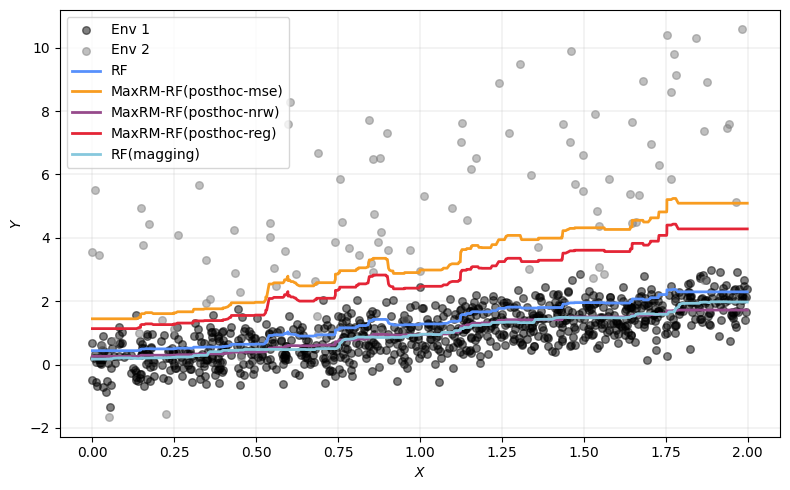

In [21]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_mse"] = preds_mse
dtr["fitted_nrw"] = preds_rw
dtr["fitted_regret"] = preds_regret
dtr["fitted_magging"] = preds_magging
dtr["Y"] = Ytr

plot_dtr(dtr, obj_comparison=True, saveplot=True, nameplot="setting8_objectives")